### Setup



```
git clone https://github.com/tensorflow/models
```

In [3]:
import sys
import os
import tensorflow as tf
import six.moves.urllib as urllib
import numpy as np
# import skimage.io as io
import tarfile
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline


sys.path.append("/mnt/hdd/Kate/au_dl_course/seminar_4/models/research/")
sys.path.append("/mnt/hdd/Kate/au_dl_course/seminar_4/models/research/slim")
sys.path.append("/mnt/hdd/Kate/au_dl_course/seminar_4/models/research/object_detection")

# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
sess = tf.Session()

In [233]:
from utils import label_map_util
from utils import visualization_utils as vis_util

checkpoints_dir = './cpkt/'

if not tf.gfile.Exists(checkpoints_dir):
    tf.gfile.MakeDirs(checkpoints_dir)

MODEL_NAME = 'ssd_mobilenet_v1_coco_11_06_2017'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

PATH_TO_CKPT = checkpoints_dir + MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('./data', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

# opener = urllib.request.URLopener()
# opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, checkpoints_dir + "/" + MODEL_FILE)
tar_file = tarfile.open(checkpoints_dir + "/" + MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, checkpoints_dir)
    
    
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [234]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [220]:
label_map_pascal = label_map_util.load_labelmap(os.path.join('./data', 'pascal_label_map.pbtxt'))
categories_pascal = label_map_util.convert_label_map_to_categories(label_map_pascal, max_num_classes=20,
                                                                   use_display_name=True)
category_index_pascal = label_map_util.create_category_index(categories_pascal)

In [221]:
print(category_index_pascal)

{1: {'id': 1, 'name': u'aeroplane'}, 2: {'id': 2, 'name': u'bicycle'}, 3: {'id': 3, 'name': u'bird'}, 4: {'id': 4, 'name': u'boat'}, 5: {'id': 5, 'name': u'bottle'}, 6: {'id': 6, 'name': u'bus'}, 7: {'id': 7, 'name': u'car'}, 8: {'id': 8, 'name': u'cat'}, 9: {'id': 9, 'name': u'chair'}, 10: {'id': 10, 'name': u'cow'}, 11: {'id': 11, 'name': u'diningtable'}, 12: {'id': 12, 'name': u'dog'}, 13: {'id': 13, 'name': u'horse'}, 14: {'id': 14, 'name': u'motorbike'}, 15: {'id': 15, 'name': u'person'}, 16: {'id': 16, 'name': u'pottedplant'}, 17: {'id': 17, 'name': u'sheep'}, 18: {'id': 18, 'name': u'sofa'}, 19: {'id': 19, 'name': u'train'}, 20: {'id': 20, 'name': u'tvmonitor'}}


In [235]:
print(category_index)

{1: {'id': 1, 'name': u'person'}, 2: {'id': 2, 'name': u'bicycle'}, 3: {'id': 3, 'name': u'car'}, 4: {'id': 4, 'name': u'motorbike'}, 5: {'id': 5, 'name': u'aeroplane'}, 6: {'id': 6, 'name': u'bus'}, 7: {'id': 7, 'name': u'train'}, 8: {'id': 8, 'name': u'truck'}, 9: {'id': 9, 'name': u'boat'}, 10: {'id': 10, 'name': u'traffic light'}, 11: {'id': 11, 'name': u'fire hydrant'}, 13: {'id': 13, 'name': u'stop sign'}, 14: {'id': 14, 'name': u'parking meter'}, 15: {'id': 15, 'name': u'bench'}, 16: {'id': 16, 'name': u'bird'}, 17: {'id': 17, 'name': u'cat'}, 18: {'id': 18, 'name': u'dog'}, 19: {'id': 19, 'name': u'horse'}, 20: {'id': 20, 'name': u'sheep'}, 21: {'id': 21, 'name': u'cow'}, 22: {'id': 22, 'name': u'elephant'}, 23: {'id': 23, 'name': u'bear'}, 24: {'id': 24, 'name': u'zebra'}, 25: {'id': 25, 'name': u'giraffe'}, 27: {'id': 27, 'name': u'backpack'}, 28: {'id': 28, 'name': u'umbrella'}, 31: {'id': 31, 'name': u'handbag'}, 32: {'id': 32, 'name': u'tie'}, 33: {'id': 33, 'name': u'suit

In [236]:
category_id = {}
for category in categories:
    for categore_voc in categories_pascal:
        if (category["name"] == categore_voc["name"]) :
            category_id[category["name"]]=  category["id"]

In [237]:
print(category_id)
print(len(category_id))

{u'sheep': 20, u'bottle': 44, u'horse': 19, u'bicycle': 2, u'motorbike': 4, u'cow': 21, u'sofa': 65, u'bus': 6, u'dog': 18, u'cat': 17, u'person': 1, u'train': 7, u'diningtable': 67, u'aeroplane': 5, u'car': 3, u'pottedplant': 64, u'tvmonitor': 72, u'chair': 62, u'bird': 16, u'boat': 9}
20


In [92]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape( (im_height, im_width, 3)).astype(np.uint8)

In [213]:
PATH_TO_VOC = './VOCdevkit/VOC2012/'
PATH_TO_TEST_IMAGES_DIR = PATH_TO_VOC + 'JPEGImages'

VAL_PATH = PATH_TO_VOC + 'ImageSets/Main/val.txt'
tests=[]
with open(VAL_PATH) as f:
    tests = f.read().splitlines()
    
TRAIN_PATH = PATH_TO_VOC + 'ImageSets/Main/train.txt'
trains=[]
with open(TRAIN_PATH) as f:
    trains = f.read().splitlines()
    
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, tests[i] + ".jpg") for i in range(len(tests)) ]
TRAIN_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, trains[i] + ".jpg") for i in range(len(trains)) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

./VOCdevkit/VOC2012/JPEGImages/2008_000002.jpg
./VOCdevkit/VOC2012/JPEGImages/2008_000003.jpg
./VOCdevkit/VOC2012/JPEGImages/2008_000007.jpg
./VOCdevkit/VOC2012/JPEGImages/2008_000009.jpg
./VOCdevkit/VOC2012/JPEGImages/2008_000016.jpg
./VOCdevkit/VOC2012/JPEGImages/2008_000021.jpg
./VOCdevkit/VOC2012/JPEGImages/2008_000026.jpg
./VOCdevkit/VOC2012/JPEGImages/2008_000027.jpg
./VOCdevkit/VOC2012/JPEGImages/2008_000032.jpg
./VOCdevkit/VOC2012/JPEGImages/2008_000034.jpg


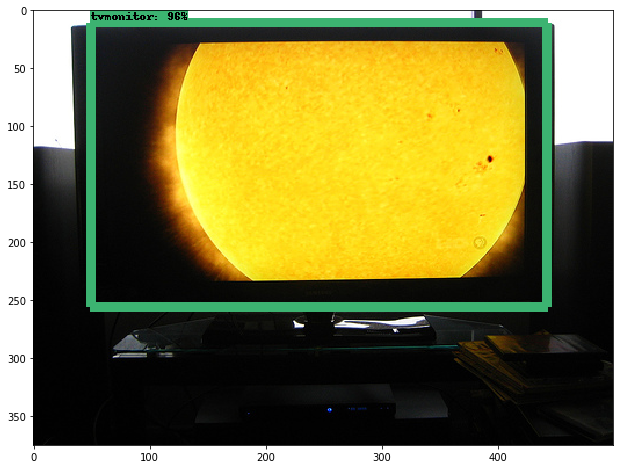

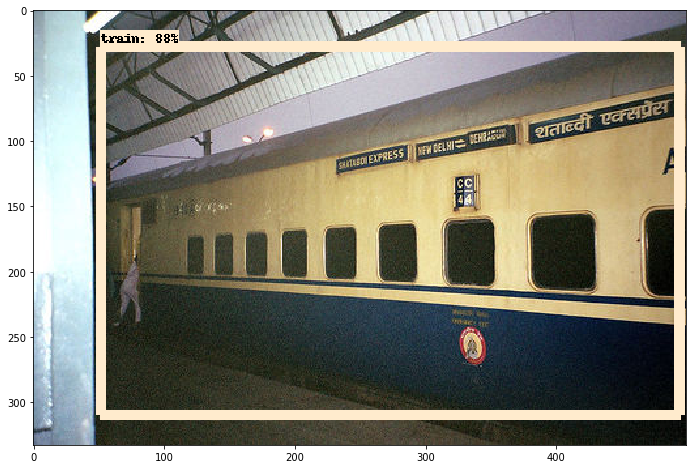

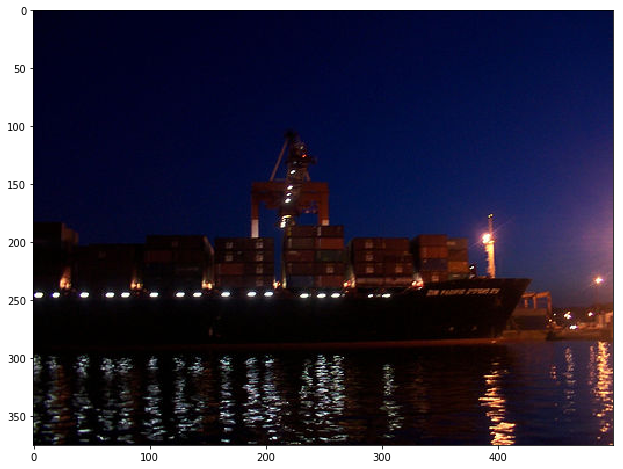

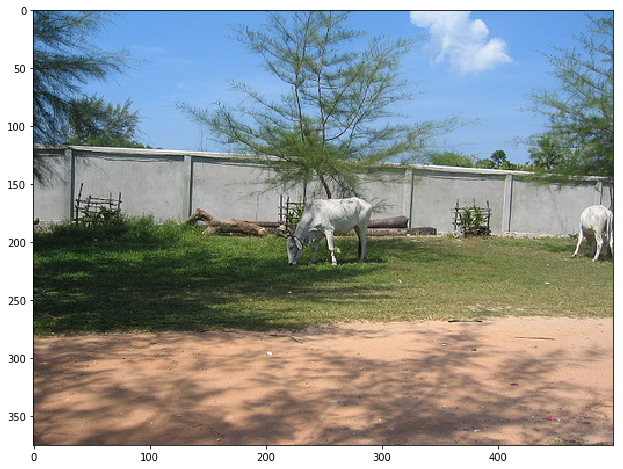

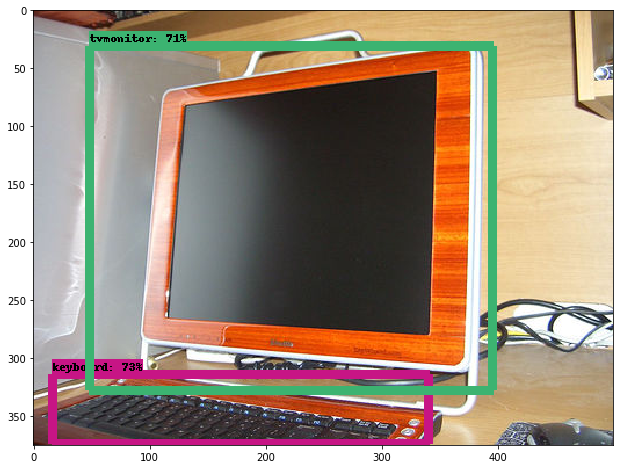

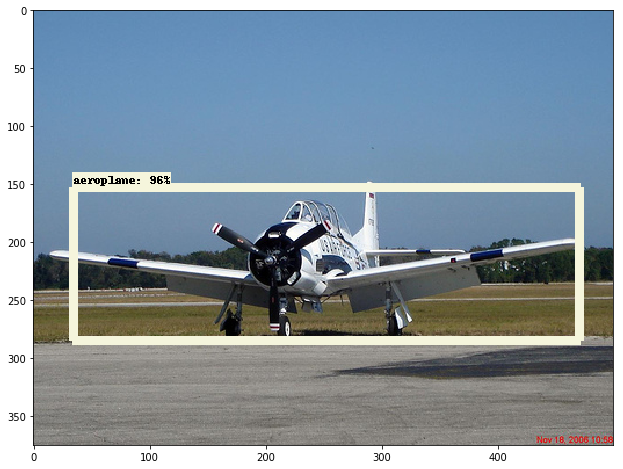

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [238]:
with detection_graph.as_default():
      with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS[:10]:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})
            print(image_path)
            vis_util.visualize_boxes_and_labels_on_image_array(
              image_np,
              np.squeeze(boxes),
              np.squeeze(classes).astype(np.int32),
                 np.squeeze(scores),
                 category_index,
                 use_normalized_coordinates=True,
                 line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)

In [239]:
import xml.etree.ElementTree as ET

PATH_TO_IMAGE_ANNOTATIONS = "./VOCdevkit/VOC2012/Annotations"
VALIDATE_IMAGE_ANNOTATIONS = [ET.parse(os.path.join(PATH_TO_IMAGE_ANNOTATIONS, "{}.xml".format(image))).getroot() 
                              for image in tests]

In [240]:
from collections import namedtuple

BBox = namedtuple("BBox", "xmin ymin xmax ymax")
Annot = namedtuple("Annot", "name bbox")
Size = namedtuple("Size", "width height" )

In [241]:
def get_bndbox(node):
    args = {child.tag: child.text for child in node}
    return BBox(float(args["xmin"]), float(args["ymin"]), 
                float(args["xmax"]), float(args["ymax"]))
    
def get_args(node) :
    return {child.tag: child for child in node}

def get_annot(node):
    args = get_args(node)
    return Annot( args["name"].text, get_bndbox(args["bndbox"]))
    
def get_annotation(node):
    return [get_annot(child) for child in node if child.tag == "object"]

def get_size(node) :
    for child_first in node:
        if child_first.tag == "size":
            args = {child.tag: child.text for child in child_first }
            return Size(float(args["width"]), float(args["height"]))

In [256]:
def check_annotation(annotation):
    annot = get_annotation(annotation)
    names = set([obj.name for obj in annot ]) 
    return all((name in category_id for name in names))

In [84]:
def get_iou(box_1, box_2):
    xmin = max(box_1.xmin, box_2.xmin)
    ymin = max(box_1.ymin, box_2.ymin)
    xmax = min(box_1.xmax, box_2.xmax)
    ymax = min(box_1.ymax, box_2.ymax)

    intersection = (xmax - xmin) * (ymax - ymin)
    square_1 = (box_1.xmax - box_1.xmin) * (box_1.ymax - box_1.ymin)
    square_2 = (box_2.xmax - box_2.xmin) * (box_2.ymax - box_2.ymin)
    union = square_1 + square_2 - intersection 
    return intersection / union

def get_real_bbox(box, size):
    return BBox(size[0] * float(box[1]), size[1] * float(box[0]),
                size[0] * float(box[3]), size[1] * float(box[2]))

In [261]:
def acc(true_obj, boxes, scores, classes, size):  
    result_with_thr = [ (boxes[idx], score, classes[idx]) for idx, score in enumerate(scores) if score >= 0.3] 
    list_true_labels =  set([ category_id[obj.name] for obj in true_obj ])    
    count_true_detection = 0
    iou = []
    for true_label in list_true_labels:
        true_boxes = [ obj.bbox for obj in true_obj if category_id[obj.name] == true_label]
        boxes_detection = [ box  for (box, scor, label) in result_with_thr if label == true_label]
        
        for box_true in true_boxes:
            for box in boxes_detection:
#                 print(get_iou(get_real_bbox(box, size), box_true), get_real_bbox(box, size), box_true)
                current_iou = get_iou(get_real_bbox(box, size), box_true)
                if (current_iou >= 0.5):
                    iou.append(current_iou)
                    count_true_detection+=1;
    
    return count_true_detection, iou

In [247]:
print(category_id['train'])

7


In [169]:
len(TEST_IMAGE_PATHS)

5823

In [258]:
images, annotations = [], []

assert len(TEST_IMAGE_PATHS) == len(VALIDATE_IMAGE_ANNOTATIONS)
for (image, annotation) in zip(TEST_IMAGE_PATHS, VALIDATE_IMAGE_ANNOTATIONS):
    if check_annotation(annotation):
        images.append(image)
        annotations.append(annotation)

In [250]:
len(images)

5823

In [264]:
count_true_detec = 0
count_all_detec = 0
iou_all = []

with detection_graph.as_default():
      with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for idx, (image_path, annot_path) in enumerate(zip(images[:1000], annotations[:1000])):
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            annot = get_annotation(annot_path)
            annot_pascal = [ann for ann in annot if ann.name in category_id ]
            count , iou = acc(annot_pascal, boxes[0], scores[0], classes[0], get_size(annot_path))
            iou_all.extend(iou)
            count_true_detec += count
            count_all_detec += len(annot_pascal)
            if idx % 10 == 0:
                print( "idx {}, Accuracy {:.3f}, IoU = {:.3f},  detect_obj = {}, true_obj = {}".format( idx, 
                         float(count_true_detec) / float(count_all_detec), np.mean(iou_all),
                         count_true_detec, count_all_detec ))

        print("Accuracy {:.3f}, IoU = {:.3f} ".format(float(count_true_detec) / float(count_all_detec), 
                                                      np.mean(iou_all)))

idx 0, Accuracy 1.000, IoU = 0.826,  detect_obj = 1, true_obj = 1
idx 10, Accuracy 0.778, IoU = 0.804,  detect_obj = 14, true_obj = 18
idx 20, Accuracy 0.761, IoU = 0.762,  detect_obj = 35, true_obj = 46
idx 30, Accuracy 0.773, IoU = 0.784,  detect_obj = 51, true_obj = 66
idx 40, Accuracy 0.701, IoU = 0.790,  detect_obj = 61, true_obj = 87
idx 50, Accuracy 0.658, IoU = 0.794,  detect_obj = 73, true_obj = 111
idx 60, Accuracy 0.703, IoU = 0.807,  detect_obj = 90, true_obj = 128
idx 70, Accuracy 0.700, IoU = 0.797,  detect_obj = 112, true_obj = 160
idx 80, Accuracy 0.673, IoU = 0.800,  detect_obj = 132, true_obj = 196
idx 90, Accuracy 0.668, IoU = 0.801,  detect_obj = 143, true_obj = 214
idx 100, Accuracy 0.692, IoU = 0.804,  detect_obj = 166, true_obj = 240
idx 110, Accuracy 0.722, IoU = 0.795,  detect_obj = 203, true_obj = 281
idx 120, Accuracy 0.720, IoU = 0.796,  detect_obj = 219, true_obj = 304
idx 130, Accuracy 0.716, IoU = 0.796,  detect_obj = 232, true_obj = 324
idx 140, Accuracy